In [55]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import json
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [56]:
def showimage(img , tick = False , title = None):
    plt.figure( figsize = (12,12))
    plt.imshow(img , cmap='gray')
    if not tick:
        plt.xticks([]) , plt.yticks([])
    if title: 
        plt.title(title)
    plt.show()

---
## 전체적인 정보 탐색

In [76]:
''' 오브젝트 별 수 '''

''' 트레이닝 데이터 '''
img_paths = []
img_groups = []
coor_paths = []

sub_list = sorted([sub for sub in glob("../data/dataset/train/*/")])

for sub in sub_list:
    tmp_img_path = []
    tmp_json_path = []
    
    for img_path in glob(sub + '*.jpg'):
        tmp_img_path.append(img_path)
        img_groups.append(sub.split('/')[4])
    for coor_path in glob(sub + '*.json'):
        tmp_json_path.append(coor_path)
    img_paths += sorted(tmp_img_path)
    coor_paths += sorted(tmp_json_path)

df_ginfo = pd.DataFrame()
df_ginfo['img_paths'] = img_paths
df_ginfo['img_groups'] = img_groups
df_ginfo['coor_paths'] = coor_paths

92.24193548387096


/ssd/jaewoo/venv/gb2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

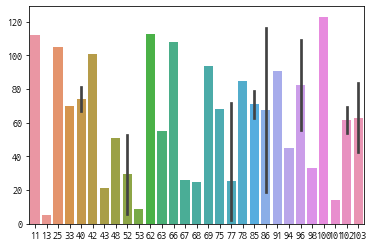

In [77]:
''' 그룹별 수 : Train '''
df_grp = df_ginfo.groupby( by = 'img_groups')
y = list(df_grp.size()) 
x = list(range(len(df_grp.size())))
print(np.mean(y))
sns.barplot(y,x)

In [71]:
''' 테스트 데이터 '''
img_paths = []
img_groups = []
coor_paths = []

sub_list = sorted([sub for sub in glob("../data/dataset/test/*/")])

for sub in sub_list:
    tmp_img_path = []
    tmp_json_path = []
    
    for img_path in glob(sub + '*.jpg'):
        tmp_img_path.append(img_path)
        img_groups.append(sub.split('/')[4])
    for coor_path in glob(sub + '*.json'):
        tmp_json_path.append(coor_path)
    img_paths += sorted(tmp_img_path)
    coor_paths += sorted(tmp_json_path)

df_ginfo = pd.DataFrame()
df_ginfo['img_paths'] = img_paths
df_ginfo['img_groups'] = img_groups
df_ginfo['coor_paths'] = coor_paths

86.27058823529411


/ssd/jaewoo/venv/gb2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

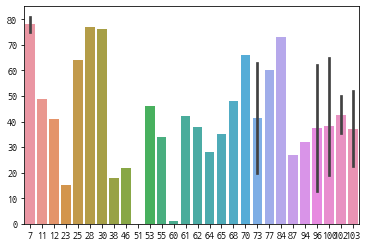

In [75]:
''' 그룹별 수 : Test '''
df_grp = df_ginfo.groupby( by = 'img_groups')
y = list(df_grp.size()) 
x = list(range(len(df_grp.size())))
print(np.mean(y))
sns.barplot(y,x)


In [83]:
for row in df_grp.size().iteritems():
    print(row)

('09xhTGOWvG', 102)
('1IfHWGbtMf', 102)
('2FINMdB8FA', 77)
('2ZUn5NjsOy', 77)
('2io6VOZw5l', 102)
('35Nnt2j9IH', 13)
('3Qx3IAKZko', 52)
('3zdESgH6pI', 102)
('4GY08vDuPn', 102)
('5MFsHl7Uei', 53)
('5ofA75UyiC', 102)
('658R6rCHZt', 102)
('66nVberACp', 102)
('69Z7zrpEFi', 102)
('6Fq5axtjRN', 101)
('6T2bwGfcCv', 102)
('6hVVXk07zi', 103)
('6mMkgGYau5', 102)
('78QitWQ2V6', 102)
('7n1AyOHFRu', 86)
('8HGNWkz2YS', 102)
('8iZZyHYHXr', 43)
('9IObHxTaZh', 102)
('9QtvnQzKlI', 102)
('9Y1hPCa3yT', 102)
('9cbMOeEeUt', 68)
('A7A6jpVkOy', 67)
('B18AIYTimz', 102)
('B7GiPnXj0S', 102)
('C3J27XDCG2', 102)
('C84FL8SfWo', 103)
('CHJs1UJOkH', 102)
('D5utuFj7XX', 102)
('DcjHyhKzlv', 98)
('Duoz97U5Hp', 102)
('EhG5tYGN2w', 103)
('EwA5N6SKWA', 102)
('G16JqtQy92', 102)
('G9qpVTzqA0', 102)
('GNqTmSH4Bb', 103)
('HiqpK7vdPY', 102)
('ITclorXwIS', 102)
('IfvfrVg5uf', 102)
('JAXrF6bnZ3', 102)
('JNG5KEjmlh', 102)
('JX9fE3ozdn', 94)
('KIIJeJ6qk6', 102)
('KKF0RDt0Xa', 102)
('KMmGLvZWqr', 102)
('KbhNgVpqCz', 102)
('LKllfWD42

---
## w 분포

In [30]:
img = cv2.imread('../data/dataset/train/09xhTGOWvG/00000.jpg' , cv2.IMREAD_GRAYSCALE)
img_slice = img[:,300:img.shape[1]-300]

In [21]:
_ , img = cv2.threshold(img , 0 , 255 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
showimage(img)

In [ ]:
showimage(img)

cv2.imshow(img)

In [26]:
contours, hierachy = cv2.findContours(img, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [32]:
''' 컨투어별 크기 '''
for i, cnt in enumerate(contours):
    print(cv2.contourArea(cnt))
    
    if i == 20:
        break

0.0
0.0
36.0
109.0
148.0
166.5
0.0
344.0
732.5
2.0
2.0
5.5
2.0
345.5
9.5
128.0
488.5
0.0
0.0
22.5
226.0


In [ ]:
''' 컨투어 그리기 '''
img_color = cv2.imread('../data/dataset/train/09xhTGOWvG/00000.jpg' )
img_slice_color = img_color[:,300:img_color.shape[1]-300]

img_slice_gray = cv2.cvtColor(img_slice_color, cv2.COLOR_BGR2GRAY)
_ , img_thres = cv2.threshold(img_slice_gray , 0 , 255 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierachy = cv2.findContours(img_thres, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
img_con_draw = cv2.drawContours(img_slice_color, contours, -1, (0,255,0), 4)
showimage(img_con_draw)    
    


In [ ]:
''' 주어진 폴리곤들의 '''

In [ ]:
''' 각 컨투어별 '''